In [1]:
import numpy as np
import scipy.special as sc_special
import tensorflow as tf 
from 	tensorflow import keras
import pandas as pd
from tensorflow.keras import optimizers,metrics,layers,Sequential
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('A-A1-A2-A3.csv',sep=',',header=0)
data.head()

,Time1,Time2,localation,temp_2m,temp_0,BS,humi,w_speed,w_dir,rain,...,QRTL,CBFS,DBFS,sunFS,SO2,NO2,PM10,PM2.5,O3,CO
0,2020/7/23,2020/7/23 0:00,A,29.8890,304.016,0.018871,66.7409,4.16382,162.577,0.000000,...,0.94818,428.278,0.0,0.0,2.401510,20.9208,8.17336,5.27729,8.78723,0.124491
1,2020/7/23,2020/7/23 1:00,A,29.8736,303.739,0.017556,62.1551,4.65267,171.978,0.000000,...,1.14987,427.531,0.0,0.0,1.448340,14.8144,6.49054,4.33106,12.74530,0.109056
2,2020/7/23,2020/7/23 2:00,A,29.6471,303.419,0.017874,64.1760,4.10031,172.013,0.000000,...,1.01616,427.428,0.0,0.0,1.271610,13.9154,6.86679,4.40045,12.22960,0.105957
3,2020/7/23,2020/7/23 3:00,A,29.4555,303.419,0.018935,68.7958,2.44317,168.135,0.047224,...,1.89003,442.472,0.0,0.0,0.467429,11.1535,5.25900,3.35261,13.78000,0.101764
4,2020/7/23,2020/7/23 4:00,A,28.5189,302.987,0.019881,76.5791,2.57759,207.884,8.260020,...,6.53753,458.394,0.0,0.0,0.574856,13.9989,6.05979,3.59303,9.96333,0.104536


In [5]:
for i in range(0,len(data)):
    if data['Time2'][i].split('/')[2].split(' ')[0] != data['Time1'][i].split('/')[2]:
        data.drop(index=[i],inplace = True)
data.to_csv('NewThree.csv')

In [6]:
len(data)

33888

In [7]:
data = pd.read_csv('four.csv',sep=',',header=0)
data.head()

,SO21,NO21,PM101,PM2.51,O31,CO1,temp_2m,temp_0,BS,humi,...,QRTL,CBFS,DBFS,sunFS,SO2,NO2,PM10,PM2.5,O3,CO
0,4,12,3,3,23,0.4,29.8890,304.016,0.018871,66.7409,...,0.94818,428.278,0.0,0.0,2.401510,20.9208,8.17336,5.27729,8.78723,0.124491
1,3,11,3,1,24,0.4,29.8736,303.739,0.017556,62.1551,...,1.14987,427.531,0.0,0.0,1.448340,14.8144,6.49054,4.33106,12.74530,0.109056
2,4,13,14,2,20,0.4,29.6471,303.419,0.017874,64.1760,...,1.01616,427.428,0.0,0.0,1.271610,13.9154,6.86679,4.40045,12.22960,0.105957
3,4,12,12,1,20,0.4,29.4555,303.419,0.018935,68.7958,...,1.89003,442.472,0.0,0.0,0.467429,11.1535,5.25900,3.35261,13.78000,0.101764
4,5,19,6,5,11,0.5,28.7843,302.383,0.019065,72.2798,...,3.81680,429.953,0.0,0.0,1.764980,21.7531,13.43040,7.64338,3.38709,0.144370


In [8]:
pollution1 = np.array(data.iloc[:,0:6])
pollution2 = np.array(data.iloc[:,-6:])
pollution1

array([[ 4. , 12. ,  3. ,  3. , 23. ,  0.4],
       [ 3. , 11. ,  3. ,  1. , 24. ,  0.4],
       [ 4. , 13. , 14. ,  2. , 20. ,  0.4],
       ...,
       [ 7. , 16. ,  9. ,  2. ,  9. ,  0.4],
       [ 4. , 16. ,  7. ,  2. ,  9. ,  0.4],
       [ 4. ,  7. , 14. ,  5. , 23. ,  0.4]])

In [12]:
#保存污染物相减后的数据，在将之前处理的预测环境数据手动添加进去
pol = pd.DataFrame(pollution1-pollution2,columns = ['SO2','NO2','PM10','PM2.5','O3','CO'])
pol.head()
pol.to_csv('DataFour.csv')

# 导入处理好的数据，若已处理好代码从这里开始

In [14]:
#数据的各个Y是差值（实测值 - 一次预测值）
data = pd.read_csv('DataFour.csv',sep=',',header=0)
#data = data.sample(frac = 1) #打乱数据
data.head()

,SO2,NO2,PM10,PM2.5,O3,CO,temp_2m,temp_0,BS,humi,...,w_dir,rain,cloud,high,press,GRTL,QRTL,CBFS,DBFS,sunFS
0,1.598490,-8.9208,-5.17336,-2.27729,14.21277,0.275509,29.8890,304.016,0.018871,66.7409,...,162.577,0.000000,0.038201,769.903,100.665,20.13770,0.94818,428.278,0.0,0.0
1,1.551660,-3.8144,-3.49054,-3.33106,11.25470,0.290944,29.8736,303.739,0.017556,62.1551,...,171.978,0.000000,0.058892,682.085,100.671,15.83330,1.14987,427.531,0.0,0.0
2,2.728390,-0.9154,7.13321,-2.40045,7.77040,0.294043,29.6471,303.419,0.017874,64.1760,...,172.013,0.000000,0.065039,627.078,100.678,12.33630,1.01616,427.428,0.0,0.0
3,3.532571,0.8465,6.74100,-2.35261,6.22000,0.298236,29.4555,303.419,0.018935,68.7958,...,168.135,0.047224,1.000000,636.497,100.675,11.12150,1.89003,442.472,0.0,0.0
4,3.235020,-2.7531,-7.43040,-2.64338,7.61291,0.355630,28.7843,302.383,0.019065,72.2798,...,196.949,0.000000,0.378593,378.039,100.772,6.92296,3.81680,429.953,0.0,0.0


In [19]:
len(data)

32498

In [17]:
data.describe()

,SO2,NO2,PM10,PM2.5,O3,CO,temp_2m,temp_0,BS,humi,...,w_dir,rain,cloud,high,press,GRTL,QRTL,CBFS,DBFS,sunFS
count,32498.000000,32498.000000,32498.000000,32498.000000,32498.000000,32498.000000,32498.000000,32498.000000,32498.000000,32498.000000,...,32498.000000,32498.000000,32498.000000,32498.000000,32498.000000,32498.000000,32498.000000,32498.000000,32498.000000,32498.000000
mean,0.094233,-15.939938,17.465385,-2.504328,17.786499,0.421860,24.916934,301.778926,0.013047,59.221886,...,124.234901,0.399914,0.465743,676.290666,101.253019,92.886432,16.606632,395.988812,208.787297,250.884365
std,7.479913,29.151128,37.532859,30.707256,35.559385,0.262027,5.980101,8.561029,0.005260,16.636423,...,82.821606,2.035541,0.328914,454.716321,0.646240,107.334489,19.380946,50.285896,273.216779,328.304546
min,-103.061000,-429.778000,-148.909000,-124.171000,-264.976000,-2.033030,2.584230,275.045000,0.000647,9.069630,...,0.004486,0.000000,0.000000,19.575400,99.713600,-23.560700,-1.390840,229.260000,0.000000,0.000000
25%,-3.115165,-30.841725,1.845700,-12.536525,-0.000526,0.283547,21.241975,296.019000,0.009172,47.172650,...,51.667050,0.000000,0.152484,326.816250,100.698000,10.046575,1.089850,361.367000,0.000000,0.000000
50%,1.401255,-12.325500,15.626820,0.382690,13.973738,0.397692,25.933200,301.836500,0.013393,59.219050,...,129.652000,0.000000,0.454778,550.314000,101.252000,37.869700,6.393675,409.094000,24.071450,28.924900
75%,4.356280,1.052725,30.490700,8.474420,33.257918,0.547795,29.218950,307.314000,0.017922,73.053650,...,180.807000,0.000000,0.782031,973.546000,101.741000,166.994250,29.836850,436.387000,390.929500,469.751250
max,58.261800,172.880700,947.092100,975.544690,269.230060,11.433869,37.532300,323.987000,0.023053,100.703000,...,359.997000,98.740700,1.000000,2314.100000,102.997000,554.955000,77.052600,491.671000,893.002000,1073.060000


In [22]:
len(data)

32498

In [45]:
index = []
for i in range(0,len(data)):
    if  (data['SO2'][i] <= -15)|(data['SO2'][i]>=15):
        index.append(i)
    elif (data['NO2'][i] <= -25) | (data['NO2'][i] >=25):
        index.append(i)
    elif (data['PM10'][i] <= -25) | (data['PM10'][i] >= 25):
        index.append(i)
    elif (data['PM2.5'][i] <= -20) | (data['PM2.5'][i] >= 20):
        index.append(i)
    elif (data['O3'][i] <= -25) | (data['O3'][i] >=25):
        index.append(i)
    elif (data['CO'][i] >=3):
        index.append(i)
data.drop(index=index,inplace = True)

In [46]:
len(index)

24320

In [48]:
data.drop(index=index,inplace = True)
data.shape

(8177, 21)

# 异常值删除结束

In [59]:
M = 4 #模型数量

In [449]:
#各污染物浓度分别建模，自变量X不变（所有环节情况）
SO2X = data.iloc[:8000,[6,7,9,10,11,12,14,16,18]] 
SO2TestX = data.iloc[8000:,[6,7,9,10,11,12,14,16,18]]
NO2X = data.iloc[:8000,[6,7,9,10,11,12,14,18]]
NO2TestX =data.iloc[8000:,[6,7,9,10,11,12,14,18]]
PM10X =data.iloc[:8000,[6,7,10,12,14,16,18]]
PM10TestX =data.iloc[8000:,[6,7,10,12,14,16,18]]
PM2_5X =data.iloc[:8000,[6,7,9,10,11,12,18]]
PM2_5TestX =data.iloc[8000:,[6,7,9,10,11,12,18]]
O3X =data.iloc[:8000,[6,7,10,12,14,16,18]]
O3TestX =data.iloc[8000:,[6,7,10,12,14,16,18]]
COX =data.iloc[:8000,[6,7,9,10,12,14]]
COTestX =data.iloc[8000:,[6,7,9,10,12,14]]
n_train = SO2X.shape[0]

SO2Y = data.iloc[:8000,0]
SO2TestY = data.iloc[8000:,0]
NO2Y = data.iloc[:8000,1]
NO2TestY = data.iloc[8000:,1]
PM10Y = data.iloc[:8000,2]
PM10TestY = data.iloc[8000:,2]
PM2_5Y = data.iloc[:8000,3]
PM2_5TestY = data.iloc[8000:,3]
O3Y = data.iloc[:8000,4]
O3TestY = data.iloc[8000:,4]
COY = data.iloc[:8000,5]
COTestY = data.iloc[8000:,5]

inputnums = [SO2X.shape[1],NO2X.shape[1],PM10X.shape[1],PM2_5X.shape[1],O3X.shape[1],COX.shape[1]]  #!!!!!!!!!!!!!!!!!!输入层结构
inputnum = inputnums[5]
outputnum = 1
hiddnum1 = 15
hiddennum = hiddnum1 
numsum = inputnum*hiddennum+hiddennum+hiddennum*outputnum+outputnum #6*10+10+10*3+3=103

LossArr = []

In [455]:
#零均值处理

SO2max = np.max(np.abs(SO2Y),axis=0)
SO2mean = np.mean(SO2Y,axis=0)
NO2max = np.max(np.abs(NO2Y),axis=0)
NO2mean = np.mean(NO2Y,axis=0)
PM10max = np.max(np.abs(PM10Y),axis=0)
PM10mean = np.mean(PM10Y,axis=0)
PM2_5max = np.max(np.abs(PM2_5Y),axis=0)
PM2_5mean = np.mean(PM2_5Y,axis=0)
O3max = np.max(np.abs(O3Y),axis=0)
O3mean = np.mean(O3Y,axis=0)
COmax = np.max(np.abs(COY),axis=0)
COmean = np.mean(COY,axis=0)
def data_progress(X,TestX):
    for i in range(0,X.shape[1]):
        X.iloc[:,i] -= np.mean(X,axis=0)[i]
        X.iloc[:,i] /= np.max(np.abs(X),axis=0)[i]
        TestX.iloc[:,i] -= np.mean(TestX,axis=0)[i]
        TestX.iloc[:,i] /= np.max(np.abs(TestX),axis=0)[i]
        
    return 0
def data_progressY(Y,TestY):
    Y -= np.mean(Y,axis=0)
    Y /= np.max(np.abs(Y),axis=0)
    TestY -= np.mean(TestY,axis=0)
    TestY /= np.max(np.abs(TestY),axis=0)
    return 1
    
data_progress(SO2X,SO2TestX)
data_progressY(SO2Y,SO2TestY)
data_progress(NO2X,NO2TestX)
data_progressY(NO2Y,NO2TestY)
data_progress(PM10X,PM10TestX)
data_progressY(PM10Y,PM10TestY)
data_progress(PM2_5X,PM2_5TestX)
data_progressY(PM2_5Y,PM2_5TestY)
data_progress(O3X,O3TestX)
data_progressY(O3Y,O3TestY)
data_progress(COX,COTestX)
data_progressY(COY,COTestY)

1

In [457]:
COmean

1.8605603169241648e-16

In [412]:
print(SO2max,SO2mean,NO2max,NO2mean,PM10max,PM10mean,PM2_5max,PM2_5mean,O3max,O3mean)

14.97744 2.9475783538887463 24.9993 -4.679705722500016 24.9965 11.227338726375043 19.9902 0.6359887460000033 24.99999156 5.7181293480728375


In [413]:

#n：布谷鸟数  m：布谷鸟的维度
def cuckoo_search(n, m, lower_boundary, upper_boundary, iter_num = 10,pa = 0.25, beta = 1.5, step_size = 0.1,alpha=0.77,xn=0.33):

    num=1
    # get initial nests' locations 
    nests,best_nest,best_fitness,lossness = generate_nests(n, m,alpha,xn, lower_boundary, upper_boundary) #alpha,xn用于tent初始化阈值和初值设置
    
    # get the best nest and record it
    LossArr.append(best_fitness) #全局变量，保存每代最佳适应度值
    

    print('\r\n BEST_LOSSNESS IS %.2f : \r\n',best_fitness)

    for _ in range(iter_num):
        
        print('\r\n******************************************************第 %d 代开始迭代优化************************************************************\r\n'%num)
        nests = update_nests(lower_boundary, upper_boundary, nests, best_nest, lossness, step_size,best_fitness)
        nests = abandon_nests(nests, lower_boundary, upper_boundary, pa)
        
        print('\r\n*****************************************************第 %d 次迭代，计算适应度********************************************************\r\n'%num)
        lossness,_ = calc_fitness( nests)
        print('\r\n*********************************************************第 %d 次迭代结束************************************************************\r\n'%num)
        
        min_loss_index = np.argmin(lossness)
        min_loss = lossness[min_loss_index]
        min_nestloss = nests[min_loss_index]
        LossArr.append(min_loss)
            
        if min_loss < best_fitness  : #and  min_loss_fit > best_two_fitness
            best_nest = min_nestloss
            best_fitness = min_loss
            print('\r\n******')
            print('\r\n 第 %d 次迭代最优Loss是 %.2f : \r\n'%(num,best_fitness))
            print('\r\n******\r\n')
        num+=1

    return (best_nest, best_fitness)

# #随机生成nest
#     lower_boundary = np.array(lower_boundary)
#     upper_boundary = np.array(upper_boundary)
#     nests = np.empty((n, m))

#     for each_nest in range(n):
#         nests[each_nest] = lower_boundary + np.array([np.random.rand() for _ in range(m)]) * (upper_boundary - lower_boundary)


In [414]:
def generate_nests(n, m,alpha,xn,upper_boundary , lower_boundary):

#Tent混沌反向初始化

# #混沌初始化
    nests = np.empty((n, m))
    sig_nest = np.empty(m)
    alpha = alpha
    xn = xn
    for i in range(0,n):   #*2 值域为【-1,1】 *6 值域为[-3,3]
        for j in range(0,m):
            if 0<=xn<alpha:
                xn = xn/alpha
                sig_nest[j]=(xn-0.5)*6
            elif alpha <= xn <= 1:
                xn = (1-xn)/(1-alpha)
                sig_nest[j] = (xn-0.5)*6
            nests[i] = sig_nest
            
# #反向初始化            
    renests = -1 * nests   #定义：Pi = ai + bi - pi  生成反向nests
    
# #拼接两个初始化nests
    nests = np.vstack((nests,renests))  #拼接nests和renests 准备计算适应度选择最优的n个nest
    
#计算适应度
    lossness,_ = calc_fitness( nests) 
    
# #根据loss值排序
    arrIndex = np.argsort(lossness)   #获得排序数组  从小到大
    lossness = lossness[arrIndex]     #将lossness数组按照从小到大排序
    nests = nests[arrIndex]    #将nests也按照相同序列进行排序，保证和lossness对齐
    
#删除多余的n组nest，这里从最底下开始一个个删，因为已经排好序了，所以删除的为效果最差的
    for i in range(n):
        nests = np.delete(nests,-1,0)
        lossness = np.delete(lossness,-1,0)
#现在的nests是按照loss排序的，第一个loss最小

    return nests,nests[0],lossness[0],lossness

In [415]:
def update_nests(lower_boundary, upper_boundary, nests, best_nest, lossness, step_coefficient,bestfitness):

    lower_boundary = np.array(lower_boundary)
    upper_boundary = np.array(upper_boundary)
    n, m = nests.shape
    # 莱维飞行生成步长：较长时间的短步长和较短时间的长步长
    #生成的步长的shape也是n*m，保证所有元素得到更新
    #这个步长通过step_size来控制大小
    steps = levy_flight(n, m, 1.5)
    new_nests = nests.copy()

    for each_nest in range(n):
        # coefficient 0.01 is to avoid levy flights becoming too aggresive
        # and (nest[each_nest] - best_nest) 保留了最佳nest，但会导致局部最优
        step_size = step_coefficient * steps[each_nest] # * (nests[each_nest] - best_nest)
        step_direction = np.random.rand(m) #0-1均匀概率分布生成方向
        #新的布谷鸟在原来的基础上加上步长和方向
        new_nests[each_nest] += step_size * step_direction  
        # apply boundary condtions
        new_nests[each_nest][new_nests[each_nest] < lower_boundary] = lower_boundary[new_nests[each_nest] < lower_boundary]
        new_nests[each_nest][new_nests[each_nest] > upper_boundary] = upper_boundary[new_nests[each_nest] > upper_boundary]

    new_losses,new_nests = calc_fitness(new_nests)
    #适应度更好的才更新过去
    
    nests[new_losses < lossness] = new_nests[new_losses < lossness] 
    return nests

In [416]:
def abandon_nests(nests, lower_boundary, upper_boundary, pa):

    lower_boundary = np.array(lower_boundary)
    upper_boundary = np.array(upper_boundary)
    n, m = nests.shape
    for each_nest in range(n):  
        #pa概率抛弃，抛弃后重新生成
        if (np.random.rand() < pa):
            #局部随机行走生成步长
            #随机两个种群相差*一个0-1的随机数
            step_size = np.random.rand() * (nests[np.random.randint(0, n)] - nests[np.random.randint(0, n)])
            nests[each_nest] += step_size
            # apply boundary condtions
            nests[each_nest][nests[each_nest] < lower_boundary] = lower_boundary[nests[each_nest] < lower_boundary]
            nests[each_nest][nests[each_nest] > upper_boundary] = upper_boundary[nests[each_nest] > upper_boundary]
    
    return nests

In [417]:
def levy_flight(n, m, beta):

    sigma_u = (sc_special.gamma(1+beta)*np.sin(np.pi*beta/2)/(sc_special.gamma((1+beta)/2)*beta*(2**((beta-1)/2))))**(1/beta)
    sigma_v = 1

    u =  np.random.normal(0, sigma_u, (n, m))
    v = np.random.normal(0, sigma_v, (n, m))

    steps = u/((np.abs(v))**(1/beta))

    return steps

In [418]:
def calc_fitness(nests):
    
    n, m = nests.shape
    lossness = np.empty(n)
    new_nests = nests
    for Sig_nest in range(n):
        chrom = nests[Sig_nest]
        #分解模型参数
        w1 = chrom[:inputnum*hiddennum]
        w1 = w1.reshape(inputnum,hiddennum)
        b1 = chrom[inputnum*hiddennum:inputnum*hiddennum+hiddennum]
        w2 = chrom[inputnum*hiddennum+hiddennum:inputnum*hiddennum+hiddennum+hiddennum*outputnum]
        w2 = w2.reshape(hiddennum,outputnum)
        b2 = chrom[inputnum*hiddennum+hiddennum+hiddennum*outputnum:]

        WB_l1 = (w1,b1)
        WB_l2 = (w2,b2)
        #创建模型，并赋予参数
        model = keras.Sequential([
            keras.layers.Dense(hiddennum,activation='relu',name='l1'),
            keras.layers.Dense(outputnum,name='l2')
        ])
        model.build(input_shape=[None,inputnum])
        
        #model.summary()
        model.compile(optimizer=optimizers.Adam(lr=0.01),
                    loss='mse',)
        
        layer1 = model.get_layer('l1')
        layer2 = model.get_layer('l2')
        layer1.set_weights(WB_l1)
        layer2.set_weights(WB_l2)
        
        #训练模型
        #！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！下面两句输入数据集
        model.fit(COX,COY,epochs=1)
        loss = model.evaluate(COX,COY)  #这里是用验证集评估，其实应该用测试集吧 evaluate产生两个结果，前面是损失，后面是准确率
        lossness[Sig_nest] = loss
        
        
        (k1,y1) = layer1.get_weights()  #获取训练后的神经网络权值，并赋值给c
        (k2,y2) = layer2.get_weights()
        c=k1.reshape(1,-1).tolist()[0] + y1.reshape(1,-1).tolist()[0] + k2.reshape(1,-1).tolist()[0] + y2.reshape(1,-1).tolist()[0]
        new_nests[Sig_nest] = c
        
        
#         if(acc>bestfitness): #在计算适应度的过程当中，发现有更好的适应度就把参数保存
#             #model.save_weights('my_model_fun.h5')
#             bestfitness = acc
    return lossness,new_nests

In [419]:
# if __name__=='__main__':
low = -5*np.ones(numsum)
upp = 5*np.ones(numsum)
i = 0
j = 0
best_nest = [] #保存每次CS最佳loss对应的nest，用于赋值给不同神经网络构成多个弱分类器
best_loss = []
best_fitness = []
alpha = [0.22,0.46,0.65,0.82]  #alpha不取0.5,0<alpha<1
xn = [0.90,0.70,0.41,0.24]  #xn值不能和alpha值相同，否则将演化为周期系统，就不是混沌系统了
for i in range(M):
    print('第 %d 个CS算法开始'%(i+1))
    nest,loss = cuckoo_search(10,numsum, low,upp, step_size = 0.4,alpha=alpha[i],xn=xn[i])
    best_nest.append(nest)
    best_loss.append(loss)

for j in range(M):    
    print('第 %d 个CS最优loss为:%.5f!'%(j+1,best_loss[j]))



第 1 个CS算法开始
250/250 [==============================] - 0s 566us/step - loss: 0.2081

 BEST_LOSSNESS IS %.2f : 
 0.11601122468709946

******************************************************第 1 代开始迭代优化************************************************************

250/250 [==============================] - 0s 658us/step - loss: 0.1282

*****************************************************第 1 次迭代，计算适应度********************************************************

250/250 [==============================] - 0s 935us/step - loss: 0.0390

*********************************************************第 1 次迭代结束************************************************************


******

 第 1 次迭代最优Loss是 0.01 : 


******


******************************************************第 2 代开始迭代优化************************************************************

250/250 [==============================] - 0s 662us/step - loss: 0.0352

*****************************************************第 2 次迭代，计算适应度********************************

250/250 [==============================] - 0s 698us/step - loss: 0.0260

*********************************************************第 2 次迭代结束************************************************************


******

 第 2 次迭代最优Loss是 0.01 : 


******


******************************************************第 3 代开始迭代优化************************************************************

250/250 [==============================] - 0s 574us/step - loss: 0.0794

*****************************************************第 3 次迭代，计算适应度********************************************************

250/250 [==============================] - 0s 698us/step - loss: 0.8993

*********************************************************第 3 次迭代结束************************************************************


******

 第 3 次迭代最优Loss是 0.01 : 


******


******************************************************第 4 代开始迭代优化************************************************************

250/250 [==============================] - 0s 594us/step - 

250/250 [==============================] - 0s 594us/step - loss: 0.0628

*****************************************************第 5 次迭代，计算适应度********************************************************

250/250 [==============================] - 0s 626us/step - loss: 0.3551

*********************************************************第 5 次迭代结束************************************************************


******************************************************第 6 代开始迭代优化************************************************************

250/250 [==============================] - 0s 578us/step - loss: 0.2521

*****************************************************第 6 次迭代，计算适应度********************************************************

250/250 [==============================] - 0s 550us/step - loss: 0.0719

*********************************************************第 6 次迭代结束************************************************************


******************************************************第 7 代开始迭代优化**********

250/250 [==============================] - 0s 566us/step - loss: 0.0186

*********************************************************第 7 次迭代结束************************************************************


******************************************************第 8 代开始迭代优化************************************************************

250/250 [==============================] - 0s 546us/step - loss: 0.0187

*****************************************************第 8 次迭代，计算适应度********************************************************

250/250 [==============================] - 0s 578us/step - loss: 0.0190

*********************************************************第 8 次迭代结束************************************************************


******************************************************第 9 代开始迭代优化************************************************************

250/250 [==============================] - 0s 578us/step - loss: 0.0854

*****************************************************第 9 次迭代，计算适应度******

250/250 [==============================] - 0s 550us/step - loss: 0.1092

*****************************************************第 10 次迭代，计算适应度********************************************************

250/250 [==============================] - 0s 562us/step - loss: 0.0165

*********************************************************第 10 次迭代结束************************************************************

第 2 个CS算法开始
250/250 [==============================] - 0s 582us/step - loss: 0.1722

 BEST_LOSSNESS IS %.2f : 
 0.05865827575325966

******************************************************第 1 代开始迭代优化************************************************************

250/250 [==============================] - 0s 562us/step - loss: 0.0817

*****************************************************第 1 次迭代，计算适应度********************************************************

250/250 [==============================] - 0s 702us/step - loss: 0.0187


250/250 [==============================] - 0s 562us/step - loss: 0.0365

*********************************************************第 1 次迭代结束************************************************************


******

 第 1 次迭代最优Loss是 0.01 : 


******


******************************************************第 2 代开始迭代优化************************************************************

250/250 [==============================] - 0s 566us/step - loss: 0.0618

*****************************************************第 2 次迭代，计算适应度********************************************************

250/250 [==============================] - 0s 550us/step - loss: 0.0217

*********************************************************第 2 次迭代结束************************************************************


******

 第 2 次迭代最优Loss是 0.01 : 


******


******************************************************第 3 代开始迭代优化************************************************************

250/250 [==============================] - 0s 542us/step - 

250/250 [==============================] - 0s 815us/step - loss: 0.0402

*****************************************************第 4 次迭代，计算适应度********************************************************

250/250 [==============================] - 0s 594us/step - loss: 0.0380

*********************************************************第 4 次迭代结束************************************************************


******

 第 4 次迭代最优Loss是 0.01 : 


******


******************************************************第 5 代开始迭代优化************************************************************

250/250 [==============================] - 0s 558us/step - loss: 0.1320

*****************************************************第 5 次迭代，计算适应度********************************************************

250/250 [==============================] - 0s 582us/step - loss: 0.0203

*********************************************************第 5 次迭代结束************************************************************


********************************

250/250 [==============================] - 0s 554us/step - loss: 0.0142

*********************************************************第 6 次迭代结束************************************************************


******************************************************第 7 代开始迭代优化************************************************************

250/250 [==============================] - 0s 570us/step - loss: 0.0235

*****************************************************第 7 次迭代，计算适应度********************************************************

250/250 [==============================] - 0s 562us/step - loss: 0.0155

*********************************************************第 7 次迭代结束************************************************************


******

 第 7 次迭代最优Loss是 0.01 : 


******


******************************************************第 8 代开始迭代优化************************************************************

250/250 [==============================] - 0s 566us/step - loss: 0.0207

*****************************

250/250 [==============================] - 0s 606us/step - loss: 0.0278

*****************************************************第 9 次迭代，计算适应度********************************************************

250/250 [==============================] - 0s 570us/step - loss: 0.0128

*********************************************************第 9 次迭代结束************************************************************


******************************************************第 10 代开始迭代优化************************************************************

250/250 [==============================] - 0s 550us/step - loss: 0.0232

*****************************************************第 10 次迭代，计算适应度********************************************************

250/250 [==============================] - 0s 594us/step - loss: 0.0114

*********************************************************第 10 次迭代结束************************************************************

第 3 个CS算法开始
250/250 [==============================] - 0s 694us/step - lo

250/250 [==============================] - 0s 546us/step - loss: 3.4351

 BEST_LOSSNESS IS %.2f : 
 0.04195006564259529

******************************************************第 1 代开始迭代优化************************************************************

250/250 [==============================] - 0s 566us/step - loss: 0.0725

*****************************************************第 1 次迭代，计算适应度********************************************************

250/250 [==============================] - 0s 598us/step - loss: 0.0244

*********************************************************第 1 次迭代结束************************************************************


******

 第 1 次迭代最优Loss是 0.01 : 


******


******************************************************第 2 代开始迭代优化************************************************************

250/250 [==============================] - 0s 546us/step - loss: 0.0250

*****************************************************第 2 次迭代，计算适应度********************************************

250/250 [==============================] - 0s 550us/step - loss: 0.0167

*****************************************************第 3 次迭代，计算适应度********************************************************

250/250 [==============================] - 0s 568us/step - loss: 0.0129

*********************************************************第 3 次迭代结束************************************************************


******************************************************第 4 代开始迭代优化************************************************************

250/250 [==============================] - 0s 594us/step - loss: 0.0436

*****************************************************第 4 次迭代，计算适应度********************************************************

250/250 [==============================] - 0s 586us/step - loss: 0.0185

*********************************************************第 4 次迭代结束************************************************************


******

 第 4 次迭代最优Loss是 0.01 : 


******


********************************

250/250 [==============================] - 0s 678us/step - loss: 0.0105

*********************************************************第 5 次迭代结束************************************************************


******

 第 5 次迭代最优Loss是 0.01 : 


******


******************************************************第 6 代开始迭代优化************************************************************

250/250 [==============================] - 0s 558us/step - loss: 0.0149

*****************************************************第 6 次迭代，计算适应度********************************************************

250/250 [==============================] - 0s 546us/step - loss: 0.0103

*********************************************************第 6 次迭代结束************************************************************


******************************************************第 7 代开始迭代优化************************************************************

250/250 [==============================] - 0s 598us/step - loss: 0.0099

*****************************

250/250 [==============================] - 0s 570us/step - loss: 0.0126

*****************************************************第 8 次迭代，计算适应度********************************************************

250/250 [==============================] - 0s 542us/step - loss: 0.0166

*********************************************************第 8 次迭代结束************************************************************


******

 第 8 次迭代最优Loss是 0.01 : 


******


******************************************************第 9 代开始迭代优化************************************************************

250/250 [==============================] - 0s 554us/step - loss: 0.0098

*****************************************************第 9 次迭代，计算适应度********************************************************

250/250 [==============================] - 0s 558us/step - loss: 0.0098

*********************************************************第 9 次迭代结束************************************************************


********************************

250/250 [==============================] - 0s 594us/step - loss: 0.0093

*********************************************************第 10 次迭代结束************************************************************

第 4 个CS算法开始
250/250 [==============================] - 0s 574us/step - loss: 0.5897

 BEST_LOSSNESS IS %.2f : 
 0.017709022387862206

******************************************************第 1 代开始迭代优化************************************************************

250/250 [==============================] - 0s 546us/step - loss: 0.0113

*****************************************************第 1 次迭代，计算适应度********************************************************

250/250 [==============================] - 0s 594us/step - loss: 0.0101

*********************************************************第 1 次迭代结束************************************************************


******

 第 1 次迭代最优Loss是 0.01 : 


******


******************************************************第 2 代开始迭代优化******************************

250/250 [==============================] - 0s 562us/step - loss: 0.0103

*****************************************************第 2 次迭代，计算适应度********************************************************

250/250 [==============================] - 0s 554us/step - loss: 0.0100

*********************************************************第 2 次迭代结束************************************************************


******

 第 2 次迭代最优Loss是 0.01 : 


******


******************************************************第 3 代开始迭代优化************************************************************

250/250 [==============================] - 0s 558us/step - loss: 0.0100

*****************************************************第 3 次迭代，计算适应度********************************************************

250/250 [==============================] - 0s 554us/step - loss: 0.0099

*********************************************************第 3 次迭代结束************************************************************


********************************

250/250 [==============================] - 0s 558us/step - loss: 4.2174

*********************************************************第 4 次迭代结束************************************************************


******************************************************第 5 代开始迭代优化************************************************************

250/250 [==============================] - 0s 598us/step - loss: 0.9404

*****************************************************第 5 次迭代，计算适应度********************************************************

250/250 [==============================] - 0s 598us/step - loss: 0.1609

*********************************************************第 5 次迭代结束************************************************************


******************************************************第 6 代开始迭代优化************************************************************

250/250 [==============================] - 0s 634us/step - loss: 0.1853

*****************************************************第 6 次迭代，计算适应度******

250/250 [==============================] - 0s 566us/step - loss: 0.0858

*****************************************************第 7 次迭代，计算适应度********************************************************

250/250 [==============================] - 0s 546us/step - loss: 1.3559

*********************************************************第 7 次迭代结束************************************************************


******************************************************第 8 代开始迭代优化************************************************************

250/250 [==============================] - 0s 550us/step - loss: 0.2504

*****************************************************第 8 次迭代，计算适应度********************************************************

250/250 [==============================] - 0s 550us/step - loss: 0.1205

*********************************************************第 8 次迭代结束************************************************************


******************************************************第 9 代开始迭代优化**********

250/250 [==============================] - 0s 562us/step - loss: 0.0338

*********************************************************第 9 次迭代结束************************************************************


******************************************************第 10 代开始迭代优化************************************************************

250/250 [==============================] - 0s 558us/step - loss: 0.0272

*****************************************************第 10 次迭代，计算适应度********************************************************

250/250 [==============================] - 0s 562us/step - loss: 0.0273

*********************************************************第 10 次迭代结束************************************************************


******

 第 10 次迭代最优Loss是 0.01 : 


******

第 1 个CS最优loss为:0.00915!
第 2 个CS最优loss为:0.00938!
第 3 个CS最优loss为:0.00912!
第 4 个CS最优loss为:0.00949!


In [420]:
best_loss

[0.009153966791927814,
 0.009379342198371887,
 0.009124599397182465,
 0.009492403827607632]

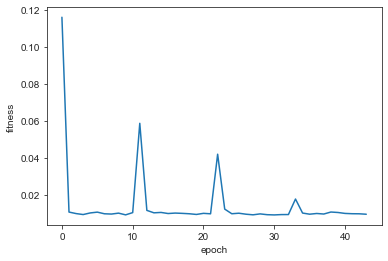

In [421]:
sns.set_style("ticks")
x = list(range(0,len(LossArr)))
fig = sns.lineplot(x,LossArr)
plt.xlabel("epoch")
plt.ylabel("fitness")
scatter_fig = fig.get_figure()
scatter_fig.savefig('./COLoss', dpi = 400)

In [422]:
Models = []
for i in range(0,M):
    chrom = best_nest[i]
    w1 = chrom[:inputnum*hiddennum]
    w1 = w1.reshape(inputnum,hiddennum)
    b1 = chrom[inputnum*hiddennum:inputnum*hiddennum+hiddennum]
    w2 = chrom[inputnum*hiddennum+hiddennum:inputnum*hiddennum+hiddennum+hiddennum*outputnum]
    w2 = w2.reshape(hiddennum,outputnum)
    b2 = chrom[inputnum*hiddennum+hiddennum+hiddennum*outputnum:]

    WB_layer1 = (w1,b1)
    WB_layer2 = (w2,b2)

    model = keras.Sequential([
        keras.layers.Dense(hiddnum1,name='layer1',activation='relu'),
        #keras.layers.Dense(hiddnum2,activation='relu'),
        #keras.layers.Dense(5,activation = 'relu'),
        keras.layers.Dense(outputnum,name='layer2')
        ])


    model.build(input_shape=[None,inputnum])
    #model.summary()
    model.compile(optimizer=optimizers.Adam(lr=0.0005),
                loss='mse',)

    layer1 = model.get_layer('layer1')
    layer2 = model.get_layer('layer2')
    layer1.set_weights(WB_layer1)
    layer2.set_weights(WB_layer2)


    model.fit(COX,COY,epochs=100)  #！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！
    Models.append(model)

Epoch 1/100
250/250 [==============================] - 0s 731us/step - loss: 0.0090
Epoch 2/100
250/250 [==============================] - 0s 747us/step - loss: 0.0089
Epoch 3/100
250/250 [==============================] - 0s 763us/step - loss: 0.0092
Epoch 4/100
250/250 [==============================] - 0s 755us/step - loss: 0.0089
Epoch 5/100
250/250 [==============================] - 0s 863us/step - loss: 0.0091
Epoch 6/100
250/250 [==============================] - 0s 714us/step - loss: 0.0086
Epoch 7/100
250/250 [==============================] - 0s 725us/step - loss: 0.0091
Epoch 8/100
250/250 [==============================] - 0s 755us/step - loss: 0.0088
Epoch 9/100
250/250 [==============================] - 0s 791us/step - loss: 0.0090
Epoch 10/100
250/250 [==============================] - 0s 827us/step - loss: 0.0092
Epoch 11/100
250/250 [==============================] - 0s 751us/step - loss: 0.0087
Epoch 12/100
250/250 [==============================] - 0s 730us/step - lo

250/250 [==============================] - 0s 702us/step - loss: 0.0093
Epoch 98/100
250/250 [==============================] - 0s 670us/step - loss: 0.0089
Epoch 99/100
250/250 [==============================] - 0s 787us/step - loss: 0.0090
Epoch 100/100
250/250 [==============================] - 0s 686us/step - loss: 0.0089
Epoch 1/100
250/250 [==============================] - 0s 662us/step - loss: 0.0150
Epoch 2/100
250/250 [==============================] - 0s 658us/step - loss: 0.0148
Epoch 3/100
250/250 [==============================] - 0s 718us/step - loss: 0.0144
Epoch 4/100
250/250 [==============================] - 0s 686us/step - loss: 0.0130
Epoch 5/100
250/250 [==============================] - 0s 726us/step - loss: 0.0130
Epoch 6/100
250/250 [==============================] - 0s 751us/step - loss: 0.0119
Epoch 7/100
250/250 [==============================] - 0s 702us/step - loss: 0.0126
Epoch 8/100
250/250 [==============================] - 0s 686us/step - loss: 0.0116


250/250 [==============================] - 0s 650us/step - loss: 0.0089
Epoch 94/100
250/250 [==============================] - 0s 658us/step - loss: 0.0089
Epoch 95/100
250/250 [==============================] - 0s 642us/step - loss: 0.0092
Epoch 96/100
250/250 [==============================] - 0s 646us/step - loss: 0.0088
Epoch 97/100
250/250 [==============================] - 0s 670us/step - loss: 0.0087
Epoch 98/100
250/250 [==============================] - 0s 642us/step - loss: 0.0088
Epoch 99/100
250/250 [==============================] - 0s 642us/step - loss: 0.0090
Epoch 100/100
250/250 [==============================] - 0s 638us/step - loss: 0.0090
Epoch 1/100
250/250 [==============================] - 0s 658us/step - loss: 0.0094
Epoch 2/100
250/250 [==============================] - 0s 695us/step - loss: 0.0088
Epoch 3/100
250/250 [==============================] - 0s 650us/step - loss: 0.0091
Epoch 4/100
250/250 [==============================] - 0s 634us/step - loss: 0.0

250/250 [==============================] - 0s 690us/step - loss: 0.0089
Epoch 90/100
250/250 [==============================] - 0s 642us/step - loss: 0.0091
Epoch 91/100
250/250 [==============================] - 0s 674us/step - loss: 0.0087
Epoch 92/100
250/250 [==============================] - 0s 634us/step - loss: 0.0085
Epoch 93/100
250/250 [==============================] - 0s 654us/step - loss: 0.0087
Epoch 94/100
250/250 [==============================] - 0s 610us/step - loss: 0.0088
Epoch 95/100
250/250 [==============================] - 0s 674us/step - loss: 0.0089
Epoch 96/100
250/250 [==============================] - 0s 662us/step - loss: 0.0085
Epoch 97/100
250/250 [==============================] - 0s 642us/step - loss: 0.0086
Epoch 98/100
250/250 [==============================] - 0s 614us/step - loss: 0.0092
Epoch 99/100
250/250 [==============================] - 0s 759us/step - loss: 0.0088
Epoch 100/100
250/250 [==============================] - 0s 690us/step - loss:

250/250 [==============================] - 0s 1ms/step - loss: 0.0084
Epoch 85/100
250/250 [==============================] - 0s 614us/step - loss: 0.0089
Epoch 86/100
250/250 [==============================] - 0s 694us/step - loss: 0.0086
Epoch 87/100
250/250 [==============================] - 0s 686us/step - loss: 0.0083
Epoch 88/100
250/250 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 89/100
250/250 [==============================] - 0s 783us/step - loss: 0.0085
Epoch 90/100
250/250 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 91/100
250/250 [==============================] - 0s 871us/step - loss: 0.0086
Epoch 92/100
250/250 [==============================] - 0s 694us/step - loss: 0.0085
Epoch 93/100
250/250 [==============================] - 0s 658us/step - loss: 0.0088
Epoch 94/100
250/250 [==============================] - 0s 622us/step - loss: 0.0087
Epoch 95/100
250/250 [==============================] - 0s 686us/step - loss: 0.0085

In [429]:
#将弱分类器按准确率从小到大排序
CSMODEL = []
acc = []
for i in range(0,M):
    accuracy = Models[i].evaluate(COTestX,COTestY)   #！！！！！！！！！！！！！！！！！！！！！！！
    acc.append(accuracy)
    
accIdx = np.argsort(acc)  #模型准确度从大到小排序，保证强分类器至少不会弱于最好的弱分类器
#accIdx = accIdx[::-1]  #取消注释从大到小排序

for i in accIdx:
    CSMODEL.append(Models[i])

for i in range(0,M):
    print('第 %d 个模型的预测结果为：\r\n'%(i+1))
    accuracy = CSMODEL[i].evaluate(COX,COY)   #！！！！！！！！！！！！！！！！！！！
 
    print('accuracy is : %.5f\r\n'%(accuracy))
Models = CSMODEL

6/6 [==============================] - 0s 999us/step - loss: 0.2958
第 1 个模型的预测结果为：

250/250 [==============================] - 0s 1ms/step - loss: 0.0087
accuracy is : 0.00875

第 2 个模型的预测结果为：

250/250 [==============================] - 0s 1ms/step - loss: 0.0089
accuracy is : 0.00892

第 3 个模型的预测结果为：

250/250 [==============================] - 0s 1ms/step - loss: 0.0089
accuracy is : 0.00886

第 4 个模型的预测结果为：

250/250 [==============================] - 0s 1ms/step - loss: 0.0089
accuracy is : 0.00894



In [430]:
pre = Models[0].predict(COTestX)  #！！！！！！！！！！！！！！！！！！！！！！！！！！！
pre = np.squeeze(pre)
print(pre[:20])

[-0.14770854 -0.11253625 -0.07659578 -0.09307647 -0.06314832 -0.03963506
 -0.02396938 -0.01655844 -0.03115997  0.00650108  0.03808141  0.08820231
  0.07846224  0.11161655 -0.03661889 -0.05700341 -0.08629113 -0.07197994
 -0.10409594 -0.11768895]


In [431]:
pre = Models[0].predict(COX)  #！！！！！！！！！！！！！！！！！！！！！！！！！！！
pre = np.squeeze(pre)
print(pre[:20])

[-0.01124212 -0.00570384 -0.00378263  0.00077003 -0.01351649 -0.00246888
 -0.01038435 -0.01038435 -0.02167106 -0.01218495 -0.00568697 -0.01891851
 -0.01989955 -0.01244664 -0.0159243  -0.00798237 -0.00888219 -0.02085203
 -0.02457434 -0.01075861]


In [432]:
print(np.array(COTestY)[:20])#！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！

[ 0.08605729  0.08712309  0.06725578  0.05526296  0.03688053 -0.02330603
 -0.03151681  0.47532717  0.0380705   0.17029157  0.25136985  0.21336327
 -0.33866849 -0.40889218 -0.03081318  0.03048574  0.05642706  0.09975228
  0.1016821   0.05746699]


# 第四问开始预测

In [433]:
#！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！最后一个数字
predata = pd.read_csv('preData.csv',sep=',',header=0,usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,20])
predata.head()

,temp_2m,temp_0,BS,humi,w_speed,w_dir,rain,cloud,high,press,GRTL,QRTL,CBFS,DBFS,sunFS,CO
0,29.2888,303.284,0.018867,69.2701,3.56274,185.930,0.0,0.015980,668.990,100.693,15.33200,0.975764,425.464,0.0,0.0,0.311734
1,29.0344,302.894,0.018827,70.2078,3.72649,187.076,0.0,0.014324,583.845,100.676,13.18090,0.965678,426.919,0.0,0.0,0.293062
2,28.7594,302.460,0.019103,72.4598,3.44374,181.234,0.0,0.022799,519.720,100.671,9.45429,0.761164,421.494,0.0,0.0,0.292159
3,28.5811,302.177,0.019443,74.5583,3.29525,183.259,0.0,0.026166,467.657,100.660,7.29238,0.649817,422.513,0.0,0.0,0.301029
4,28.3925,301.869,0.019725,76.5425,3.32493,184.781,0.0,0.031260,384.344,100.672,5.30148,0.537449,420.900,0.0,0.0,0.275404


In [434]:
# preX = predata.iloc[:,[0,1,3,4,5,6,8,10,12]]    #！！！！！！！！！！！！！！！！！！！！！！！
# SO2 = np.array(predata['SO2'])        
# preX.head()

# preX = predata.iloc[:,[0,1,3,4,5,6,8,12]] 
# NO2 = np.array(predata['NO2'])
# preX.head()

# preX = predata.iloc[:,[0,1,4,6,8,10,12]] 
# PM10 = np.array(predata['PM10'])
# preX.head()

# preX = predata.iloc[:,[0,1,3,4,5,6,12]] 
# PM2_5 = np.array(predata['PM2.5'])
# preX.head()

# preX = predata.iloc[:,[0,1,3,4,5,6,12]] 
# O3 = np.array(predata['O3'])
# preX.head()

preX = predata.iloc[:,[0,1,3,4,6,8]] 
CO = np.array(predata['CO'])
preX.head()


# SO2X = data.iloc[:7900,[6,7,9,10,11,12,14,16,18]] 
# SO2TestX = data.iloc[7900:,[6,7,9,10,11,12,14,16,18]]
# NO2X = data.iloc[:7900,[6,7,9,10,11,12,14,18]]
# NO2TestX =data.iloc[7900:,[6,7,9,10,11,12,14,18]]
# PM10X =data.iloc[:7900,[6,7,10,12,14,16,18]]
# PM10TestX =data.iloc[7900:,[6,7,10,12,14,16,18]]
# PM2_5X =data.iloc[:7900,[6,7,9,10,11,12,18]]
# PM2_5TestX =data.iloc[7900:,[6,7,9,10,11,12,18]]
# O3X =data.iloc[:7900,[6,7,10,12,14,16,18]]
# O3TestX =data.iloc[7900:,[6,7,10,12,14,16,18]]
# COX =data.iloc[:7900,[6,7,9,10,12,14]]
# COTestX =data.iloc[7900:,[6,7,9,10,12,14]]

,temp_2m,temp_0,humi,w_speed,rain,high
0,29.2888,303.284,69.2701,3.56274,0.0,668.990
1,29.0344,302.894,70.2078,3.72649,0.0,583.845
2,28.7594,302.460,72.4598,3.44374,0.0,519.720
3,28.5811,302.177,74.5583,3.29525,0.0,467.657
4,28.3925,301.869,76.5425,3.32493,0.0,384.344


In [435]:
#零均值处理
def data_progress(X):
    for i in range(0,X.shape[1]):
        X.iloc[:,i] -= np.mean(X,axis=0)[i]
        X.iloc[:,i] /= np.max(np.abs(X),axis=0)[i]

    return 0
data_progress(preX)
preX

,temp_2m,temp_0,humi,w_speed,rain,high
0,-0.408770,-0.520980,0.671648,-0.003093,-0.018699,-0.140247
1,-0.458358,-0.551552,0.708481,0.047986,-0.018699,-0.202279
2,-0.511962,-0.585573,0.796940,-0.040212,-0.018699,-0.248998
3,-0.546717,-0.607757,0.879370,-0.086530,-0.018699,-0.286928
4,-0.583480,-0.631900,0.957310,-0.077272,-0.018699,-0.347626
...,...,...,...,...,...,...
283,0.624168,0.608291,-0.245344,0.152207,0.097526,0.409437
284,0.561910,0.341533,-0.173143,0.222574,0.019859,0.382466
285,0.433241,0.165236,-0.116281,-0.027463,0.378570,0.350439
286,0.337533,-0.091330,-0.152639,0.564684,0.347059,0.247604


In [436]:
# y_pred_train = Models[0].predict(SO2X)       #！！！！！！！！！！！！！！！！！！
# len(y_pred_train)
# temp = np.array(abs(np.squeeze(y_pred_train) - SO2Y)) #！！！！！！！！！！！！！！！！！
# len(temp)

In [437]:
y_pre_train = []
# 初始化数据权重
w_data = np.ones(n_train) / n_train
# 初始化模型权重
w_model = np.zeros(M)
#train_y = tf.argmax(Y_onehot,axis=1)  #train_y保存了原始训练集中标签经过onehot编码后的结果
#k = 3 #分类数量
for i in range(M):
    miss = []
    #求第i个弱分类器训练集结果
    y_pred_train = Models[i].predict(COX)  #三元概率   ！！！！！！！！！！！！！！！！！！！！！
    y_pred_train = np.squeeze(y_pred_train)
    temp = np.array(abs(y_pred_train - COY))  #！！！！！！！！！！！！！！！！！！！！！！！！！！！
    #y_pred_train = tf.argmax(y_pred_train,axis=1)#去最大概率的位置为预测值

    #求第i个弱分类器误差
    for k in range(0,len(y_pred_train)):
        if temp[k] > 0.1:   #！！！！！！！！！！！！！！！！！！！！！！！！！！ 10倍
            miss.append(1)
        else:
            miss.append(0)
    #miss = [int(x) for x in range(0,len(y_pred_train)) (y_pred_train != train_y)]  #不相等则保存1，相等则保存0

    error =np.dot(w_data, miss) #累加识别错误的样本权重，得到分类器误差
    print('第 %d 个模型的误差是：%.2f'%(i,error))
    #求第i个弱分类器权值，保存到w_model中
    #a = 1/2 * log(1-e/e) + log(k-1),当k = 2 时为二分类更新权值公式不用修改，否则为多分类，算法准确率大于1/k即可
    #该函数若准确率大于0.5（1-error）则值为正，否则为负值，越大说明模型分类越好
    w_model[i] = 0.5 * np.log((1-error)/error) #+ np.log(k - 1)  
    
    # 更新数据权重 
    #分类结果和真实的结果一致，那么结果是−w_model[m]，是一个负值，
    #那么exp(-w_model[m]*train_y[i]*y_pred_train[i]) 结果小于1。也就是说该数据集的样本权重降低。否则该数据样本的权重增高。
    #通过这种计算就可以让那些容易分错的样本的权重升高，容易分对的样本权重降低。继续迭代就会导致对难分的样本能分对的模型的权重上涨。
    #最终，达到一个强分类器的目的。
    #注意，这里只适合二分类【1，-1】
    #多分类公式修改 wt = wt-1 * exp(at * (y_true!=y_pred)) 
    miss1 = np.array(miss)
    miss1 = w_model[i]*miss1
    for j in range(n_train):
        w_data[j] = w_data[j] * np.exp(miss1[j])  #*train_y[i]*y_pred_train[i] #二分类时用这个
    
    #正则化数据权值
    Z = np.sum(w_data)
    for j in range(n_train):
        w_data[j] /= Z

#结果这个模块以后将得到每个模型的权值，保存在w_model中

第 0 个模型的误差是：0.24
第 1 个模型的误差是：0.34
第 2 个模型的误差是：0.40
第 3 个模型的误差是：0.45


In [438]:
#弱分类器权值归一化
w_model = np.array(w_model / np.sum(w_model))
w_model

array([0.4807478, 0.2664828, 0.1659931, 0.0867763])

In [439]:
models_pre_ds = np.array([Models[m].predict(preX) for m in range(M)])
models_pre_ds = np.squeeze(models_pre_ds)
models_pre_ds

array([[ 0.08250022,  0.08645892,  0.10790467, ...,  0.08255142,
         0.09326959, -0.0051859 ],
       [ 0.10105741,  0.08951402,  0.12675339, ...,  0.03912383,
         0.04952657, -0.00444472],
       [-0.00310087, -0.00373697,  0.04094768, ...,  0.00784969,
        -0.0022049 , -0.00838351],
       [ 0.03403616,  0.03602433,  0.04278827, ..., -0.45337248,
        -0.52279925, -0.07016611]], dtype=float32)

In [440]:
models_pre_ds.shape  #4个模型得到的结果为4,288

(4, 288)

In [441]:
result1 = w_model[0]*models_pre_ds[0]
for i in range(1,M):
    result1 += w_model[i] * models_pre_ds[i]


In [442]:
#预测到数据后反归一化
pre_four = result1.copy()
pre_four = np.squeeze(pre_four)
pre_four = np.array(pre_four)

In [458]:
pre_four = pre_four*COmax      #！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！
pre_four = pre_four+COmean

In [459]:
#添加一次预测结果，得到最终结果
result = pre_four + CO  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!！！！！！！！！！！！！！！！！！！！！！！！！
result1 = result[0:24]
result2 = result[24:48]
result3 = result[48:72]
result4 = result[72:96]
result5 = result[96:120]
result6 = result[120:144]
result7 = result[144:168]
result8 = result[168:192]
result9 = result[192:216]
result10 = result[216:240]
result11 = result[240:264]
result12 = result[264:]
len(result1),len(result2),len(result3),len(result4),len(result5),len(result6),len(result7),len(result8),len(result9),len(result10),len(result11),len(result12)

(24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24)

In [460]:
#去负值，对最终预测数据进行处理
index1 = []
index2 = []
index3 = []
index4 = []
index5 = []
index6 = []
index7 = []
index8 = []
index9 = []
index10 = []
index11 = []
index12 = []
for i in range(0,len(result1)):
    if result1[i] <= 0 :
        index1.append(i)
for i in range(0,len(result2)):
    if result2[i] <= 0 :
        index2.append(i)
for i in range(0,len(result3)):
    if result3[i] <= 0 :
        index3.append(i)
for i in range(0,len(result4)):
    if result4[i] <= 0 :
        index4.append(i)
for i in range(0,len(result5)):
    if result5[i] <= 0 :
        index5.append(i)
for i in range(0,len(result6)):
    if result6[i] <= 0 :
        index6.append(i)
for i in range(0,len(result7)):
    if result7[i] <= 0 :
        index7.append(i)
for i in range(0,len(result8)):
    if result8[i] <= 0 :
        index8.append(i)
for i in range(0,len(result9)):
    if result9[i] <= 0 :
        index9.append(i)
for i in range(0,len(result10)):
    if result10[i] <= 0 :
        index10.append(i)
for i in range(0,len(result11)):
    if result11[i] <= 0 :
        index11.append(i)
for i in range(0,len(result12)):
    if result12[i] <= 0 :
        index12.append(i)

result1 = np.delete(result1, index1)
result2 = np.delete(result2, index2)
result3 = np.delete(result3,index3)
result4 = np.delete(result4,index4)
result5 = np.delete(result5,index5)
result6 = np.delete(result6,index6)
result7 = np.delete(result7, index7)
result8 = np.delete(result8, index8)
result9 = np.delete(result9,index9)
result10 = np.delete(result10,index10)
result11 = np.delete(result11,index11)
result12 = np.delete(result12,index12)
result1

array([0.38076466, 0.36098663, 0.38832157, 0.41650182, 0.39947067,
       0.37440705, 0.40671382, 0.38020724, 0.31541508, 0.30926008,
       0.23466842, 0.16703126, 0.28113074, 0.20918232, 0.1463911 ,
       0.16048486, 0.12547045, 0.0057676 , 0.07146281, 0.06527643,
       0.14859846, 0.22207444])

In [461]:
# #去除3个最大最小值

result1 = np.sort(result1)[3:-3]
result2 = np.sort(result2)[3:-3]
result3 = np.sort(result3)[3:-3]
result4 = np.sort(result4)[3:-3]
result5 = np.sort(result5)[3:-3]
result6 = np.sort(result6)[3:-3]
result7 = np.sort(result7)[3:-3]
result8 = np.sort(result8)[3:-3]
result9 = np.sort(result9)[3:-3]
result10 = np.sort(result10)[3:-3]
result11 = np.sort(result11)[3:-3]
result12 = np.sort(result12)[3:-3]

In [462]:
len(result1),len(result2),len(result3),len(result4),len(result5),len(result6),len(result7),len(result8),len(result9),len(result10),len(result11),len(result12)

(16, 18, 18, 13, 17, 17, 14, 18, 18, 17, 18, 18)

In [463]:
sum(result1)/len(result1),sum(result2)/len(result2),sum(result3)/len(result3)

(0.262774647243645, 0.2397340638278988, 0.3011235684811605)

In [464]:
sum(result4)/len(result4),sum(result5)/len(result5),sum(result6)/len(result6)

(0.1566768095512482, 0.15220374159089256, 0.22283635961128684)

In [465]:
sum(result7)/len(result7),sum(result8)/len(result8),sum(result9)/len(result9)

(0.1767446566340753, 0.1868472521765265, 0.24974752671153677)

In [466]:
sum(result10)/len(result10),sum(result11)/len(result11),sum(result12)/len(result12)

(0.2543463481168396, 0.24592837615107005, 0.33233820744997267)